In [1]:
import pandas as pd
import numpy as np

In [4]:
exo_train_df=pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTrain.csv')
exo_test_df=pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTest.csv')
print(exo_train_df.shape)
exo_test_df.shape

(5087, 3198)


(570, 3198)

In [6]:
def mean_normalise(series):
    norm_series=(series-series.mean())/(series.max()-series.min())
    return norm_series

In [7]:
norm_train_df=exo_train_df.iloc[:,1:].apply(mean_normalise,axis=1)
norm_train_df.insert(loc=0,column='LABEL',value=exo_train_df['LABEL'])

In [10]:
norm_test_df=exo_test_df.iloc[:,1:].apply(mean_normalise,axis=1)
norm_test_df.insert(loc=0,column='LABEL',value=exo_test_df['LABEL'])

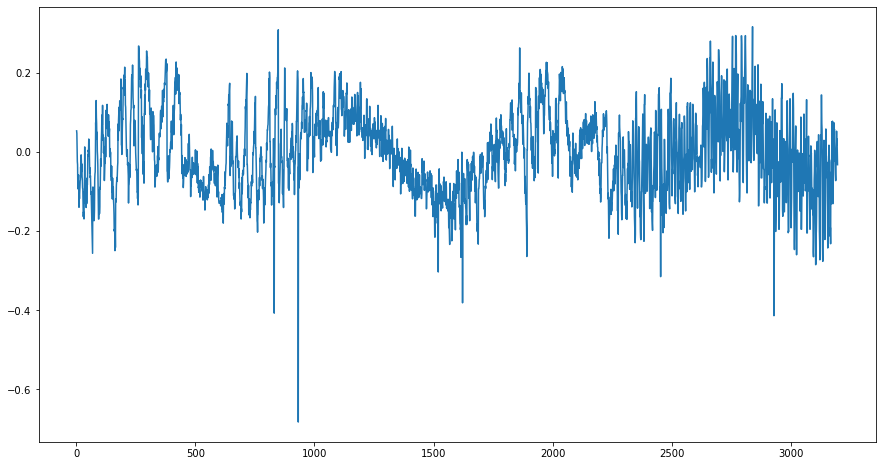

In [15]:
import matplotlib.pyplot as plt
star_0=norm_train_df.iloc[0,1:]
plt.figure(figsize=(15,8))
plt.plot(np.arange(1,3198),star_0)
plt.show()

In [18]:
fft_star0=np.abs(np.fft.fft(star_0))

In [19]:
freq=np.fft.fftfreq(len(star_0))
freq

array([ 0.        ,  0.00031279,  0.00062559, ..., -0.00093838,
       -0.00062559, -0.00031279])

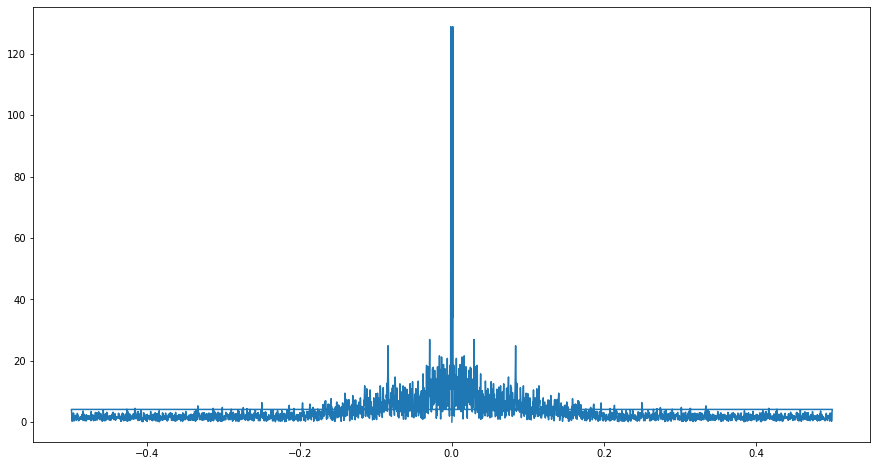

In [20]:
plt.figure(figsize=(15,8))
plt.plot(freq,fft_star0)
plt.show()

In [21]:
def fast_fourier_transform(star):
    fft_star=np.fft.fft(star,n=len(star))
    return np.abs(fft_star)

In [22]:
x_fft_train_T=norm_train_df.iloc[:,1:].T.apply(fast_fourier_transform,axis=0)
x_fft_train=x_fft_train_T.T

In [24]:
x_fft_test_T=norm_test_df.iloc[:,1:].T.apply(fast_fourier_transform,axis=0)
x_fft_test=x_fft_test_T.T